# Otimização de hiperparâmetros

**Sem otimização**

In [1]:
# importe as principais bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# desabilita os warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Carregar o dataset

df = pd.read_csv('../datasets/german_credit_data.csv', index_col=0)

# Define features (nesse caso só num) e o target

df_model = df.select_dtypes(np.number)

df_model = pd.concat([df_model, df['Risk']], axis=1)

X = df_model.drop(columns=['Risk'])
y = df_model['Risk']

# Separa em treino e test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Grid Search**

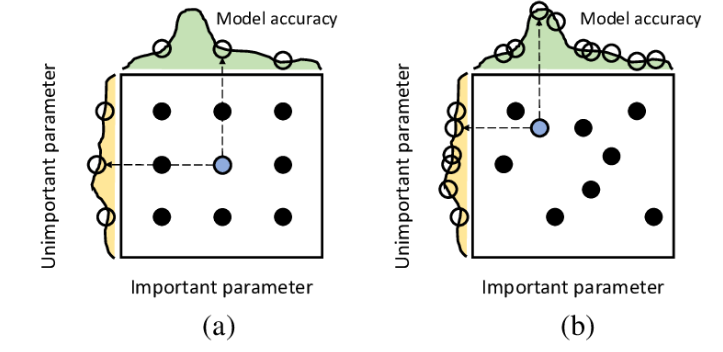

In [23]:
# Pipeline 
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


pipe = Pipeline([("dt", DecisionTreeClassifier(random_state=42))])

# ============================================

params_grid_dt = {"dt__criterion" : ["gini", "entropy"],
                  "dt__splitter" : ["best", "random"],
                  "dt__max_depth" : range(2, 11)} 

splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_dt = GridSearchCV(estimator=pipe,
                       param_grid=params_grid_dt,
                       scoring="f1_weighted",
                       cv=splitter,
                       verbose=10)

grid_dt.fit(X_train, y_train)

# ============================================

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5; 1/36] START dt__criterion=gini, dt__max_depth=2, dt__splitter=best.....
[CV 1/5; 1/36] END dt__criterion=gini, dt__max_depth=2, dt__splitter=best;, score=0.672 total time=   0.0s
[CV 2/5; 1/36] START dt__criterion=gini, dt__max_depth=2, dt__splitter=best.....
[CV 2/5; 1/36] END dt__criterion=gini, dt__max_depth=2, dt__splitter=best;, score=0.655 total time=   0.0s
[CV 3/5; 1/36] START dt__criterion=gini, dt__max_depth=2, dt__splitter=best.....
[CV 3/5; 1/36] END dt__criterion=gini, dt__max_depth=2, dt__splitter=best;, score=0.607 total time=   0.0s
[CV 4/5; 1/36] START dt__criterion=gini, dt__max_depth=2, dt__splitter=best.....
[CV 4/5; 1/36] END dt__criterion=gini, dt__max_depth=2, dt__splitter=best;, score=0.643 total time=   0.0s
[CV 5/5; 1/36] START dt__criterion=gini, dt__max_depth=2, dt__splitter=best.....
[CV 5/5; 1/36] END dt__criterion=gini, dt__max_depth=2, dt__splitter=best;, score=0.584 total time=   0.0

[CV 2/5; 10/36] END dt__criterion=gini, dt__max_depth=6, dt__splitter=random;, score=0.584 total time=   0.0s
[CV 3/5; 10/36] START dt__criterion=gini, dt__max_depth=6, dt__splitter=random..
[CV 3/5; 10/36] END dt__criterion=gini, dt__max_depth=6, dt__splitter=random;, score=0.596 total time=   0.0s
[CV 4/5; 10/36] START dt__criterion=gini, dt__max_depth=6, dt__splitter=random..
[CV 4/5; 10/36] END dt__criterion=gini, dt__max_depth=6, dt__splitter=random;, score=0.623 total time=   0.0s
[CV 5/5; 10/36] START dt__criterion=gini, dt__max_depth=6, dt__splitter=random..
[CV 5/5; 10/36] END dt__criterion=gini, dt__max_depth=6, dt__splitter=random;, score=0.610 total time=   0.0s
[CV 1/5; 11/36] START dt__criterion=gini, dt__max_depth=7, dt__splitter=best....
[CV 1/5; 11/36] END dt__criterion=gini, dt__max_depth=7, dt__splitter=best;, score=0.683 total time=   0.0s
[CV 2/5; 11/36] START dt__criterion=gini, dt__max_depth=7, dt__splitter=best....
[CV 2/5; 11/36] END dt__criterion=gini, dt__max

[CV 3/5; 20/36] END dt__criterion=entropy, dt__max_depth=2, dt__splitter=random;, score=0.591 total time=   0.0s
[CV 4/5; 20/36] START dt__criterion=entropy, dt__max_depth=2, dt__splitter=random
[CV 4/5; 20/36] END dt__criterion=entropy, dt__max_depth=2, dt__splitter=random;, score=0.619 total time=   0.0s
[CV 5/5; 20/36] START dt__criterion=entropy, dt__max_depth=2, dt__splitter=random
[CV 5/5; 20/36] END dt__criterion=entropy, dt__max_depth=2, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 1/5; 21/36] START dt__criterion=entropy, dt__max_depth=3, dt__splitter=best.
[CV 1/5; 21/36] END dt__criterion=entropy, dt__max_depth=3, dt__splitter=best;, score=0.677 total time=   0.0s
[CV 2/5; 21/36] START dt__criterion=entropy, dt__max_depth=3, dt__splitter=best.
[CV 2/5; 21/36] END dt__criterion=entropy, dt__max_depth=3, dt__splitter=best;, score=0.635 total time=   0.0s
[CV 3/5; 21/36] START dt__criterion=entropy, dt__max_depth=3, dt__splitter=best.
[CV 3/5; 21/36] END dt__criterio

[CV 5/5; 32/36] END dt__criterion=entropy, dt__max_depth=8, dt__splitter=random;, score=0.688 total time=   0.0s
[CV 1/5; 33/36] START dt__criterion=entropy, dt__max_depth=9, dt__splitter=best.
[CV 1/5; 33/36] END dt__criterion=entropy, dt__max_depth=9, dt__splitter=best;, score=0.688 total time=   0.0s
[CV 2/5; 33/36] START dt__criterion=entropy, dt__max_depth=9, dt__splitter=best.
[CV 2/5; 33/36] END dt__criterion=entropy, dt__max_depth=9, dt__splitter=best;, score=0.644 total time=   0.0s
[CV 3/5; 33/36] START dt__criterion=entropy, dt__max_depth=9, dt__splitter=best.
[CV 3/5; 33/36] END dt__criterion=entropy, dt__max_depth=9, dt__splitter=best;, score=0.627 total time=   0.0s
[CV 4/5; 33/36] START dt__criterion=entropy, dt__max_depth=9, dt__splitter=best.
[CV 4/5; 33/36] END dt__criterion=entropy, dt__max_depth=9, dt__splitter=best;, score=0.637 total time=   0.0s
[CV 5/5; 33/36] START dt__criterion=entropy, dt__max_depth=9, dt__splitter=best.
[CV 5/5; 33/36] END dt__criterion=entr

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('dt',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': range(2, 11),
                         'dt__splitter': ['best', 'random']},
             scoring='f1_weighted', verbose=10)

In [25]:
grid_dt.best_params_

{'dt__criterion': 'entropy', 'dt__max_depth': 8, 'dt__splitter': 'random'}


Métricas de avaliação de treino:
[[ 88 152]
 [ 32 528]]


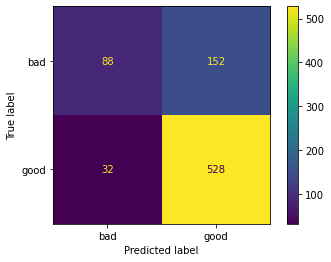

              precision    recall  f1-score   support

         bad       0.73      0.37      0.49       240
        good       0.78      0.94      0.85       560

    accuracy                           0.77       800
   macro avg       0.75      0.65      0.67       800
weighted avg       0.76      0.77      0.74       800


Métricas de avaliação de teste:
[[ 14  46]
 [ 13 127]]


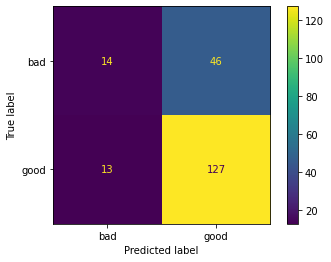

              precision    recall  f1-score   support

         bad       0.52      0.23      0.32        60
        good       0.73      0.91      0.81       140

    accuracy                           0.70       200
   macro avg       0.63      0.57      0.57       200
weighted avg       0.67      0.70      0.66       200



In [26]:
# ============================================

dt = DecisionTreeClassifier(criterion='entropy', max_depth=8, splitter='random', random_state=42).fit(X_train, y_train)

# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = dt.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = dt.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

# Random Search

É parecido com o grid search pois vamos montar um grupo (lista) de escolhas possíveis. Porém, ao invés de compararmos **todas** as escolhas, nós pegaremos **amostras aleatórias** (sem reposição) delas e selecionaremos o melhor caso dentro dessa amostra.

Uma outra forma de buscar por hiperparâmetros é através **de uma busca aleatória**, o que pode ser feito através do [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

<img src="https://www.yourdatateacher.com/wp-content/uploads/2021/03/image-7.png" width=400>

A diferença entre este buscador e o GridSearch, é que neste caso não explicitamos a lista com os valores dos hiperparâmetros a serem combinados, mas passamos **os valores possíveis dos hiperparâmetros, que são amostrados aleatoriamente de modo a gerar combinações aleatórias!** 

Aí, ao invés de tentarmos todas as combinações possíveis, testamos apenas **um número determinado de combinações aleatoriamente amostradas das distribuições!**

<img src=https://miro.medium.com/max/1004/0*yDmmJmvRowl0cSN8.png width=700>

Para mais informações sobre este método, [clique aqui!](https://scikit-learn.org/stable/modules/grid_search.html#randomized-parameter-search).

[Veja aqui](https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html) uma comparação entre os dois métodos.

Em algumas situações, pode ser que a busca aleatória seja mais eficiente que o grid search, dado seu caráter aleatório!

In [27]:
from sklearn.model_selection import RandomizedSearchCV

In [28]:
import scipy

# distirbuição uniforme sobre o espaço amostral (0, 1) pro hiperparametro dt__min_impurity_decrease
scipy.stats.uniform(0, 1)

In [34]:
# ============================================
# pipe com só uma etapa (modelagem), pq nao fizemos nada de preprocessamento

pipe = Pipeline([("dt", DecisionTreeClassifier(random_state=42))])

# ============================================

params_ditro_dt = {"dt__criterion" : ["gini", "entropy"],
                   "dt__splitter" : ["best", "random"],
                   "dt__min_impurity_decrease" : scipy.stats.uniform(0, 1)} 

splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_dt_random = RandomizedSearchCV(estimator=pipe,
                                     n_iter=100,
                                     param_distributions=params_ditro_dt,
                                     scoring="f1_weighted",
                                     cv=splitter,
                                     verbose=10)

grid_dt_random.fit(X_train, y_train)

# ============================================

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5; 1/100] START dt__criterion=gini, dt__min_impurity_decrease=0.027522267324453287, dt__splitter=best
[CV 1/5; 1/100] END dt__criterion=gini, dt__min_impurity_decrease=0.027522267324453287, dt__splitter=best;, score=0.576 total time=   0.0s
[CV 2/5; 1/100] START dt__criterion=gini, dt__min_impurity_decrease=0.027522267324453287, dt__splitter=best
[CV 2/5; 1/100] END dt__criterion=gini, dt__min_impurity_decrease=0.027522267324453287, dt__splitter=best;, score=0.576 total time=   0.0s
[CV 3/5; 1/100] START dt__criterion=gini, dt__min_impurity_decrease=0.027522267324453287, dt__splitter=best
[CV 3/5; 1/100] END dt__criterion=gini, dt__min_impurity_decrease=0.027522267324453287, dt__splitter=best;, score=0.576 total time=   0.0s
[CV 4/5; 1/100] START dt__criterion=gini, dt__min_impurity_decrease=0.027522267324453287, dt__splitter=best
[CV 4/5; 1/100] END dt__criterion=gini, dt__min_impurity_decrease=0.027522267324453287, 

[CV 1/5; 9/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.9371031143389994, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 2/5; 9/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.9371031143389994, dt__splitter=random
[CV 2/5; 9/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.9371031143389994, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 3/5; 9/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.9371031143389994, dt__splitter=random
[CV 3/5; 9/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.9371031143389994, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 4/5; 9/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.9371031143389994, dt__splitter=random
[CV 4/5; 9/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.9371031143389994, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 5/5; 9/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.9371031143389994, dt__spli

[CV 2/5; 16/100] END dt__criterion=gini, dt__min_impurity_decrease=0.4937254312495496, dt__splitter=best;, score=0.576 total time=   0.0s
[CV 3/5; 16/100] START dt__criterion=gini, dt__min_impurity_decrease=0.4937254312495496, dt__splitter=best
[CV 3/5; 16/100] END dt__criterion=gini, dt__min_impurity_decrease=0.4937254312495496, dt__splitter=best;, score=0.576 total time=   0.0s
[CV 4/5; 16/100] START dt__criterion=gini, dt__min_impurity_decrease=0.4937254312495496, dt__splitter=best
[CV 4/5; 16/100] END dt__criterion=gini, dt__min_impurity_decrease=0.4937254312495496, dt__splitter=best;, score=0.576 total time=   0.0s
[CV 5/5; 16/100] START dt__criterion=gini, dt__min_impurity_decrease=0.4937254312495496, dt__splitter=best
[CV 5/5; 16/100] END dt__criterion=gini, dt__min_impurity_decrease=0.4937254312495496, dt__splitter=best;, score=0.576 total time=   0.0s
[CV 1/5; 17/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.07986259555596598, dt__splitter=random
[CV 1/5; 17/10

[CV 1/5; 26/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.15593406822037592, dt__splitter=best;, score=0.576 total time=   0.0s
[CV 2/5; 26/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.15593406822037592, dt__splitter=best
[CV 2/5; 26/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.15593406822037592, dt__splitter=best;, score=0.576 total time=   0.0s
[CV 3/5; 26/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.15593406822037592, dt__splitter=best
[CV 3/5; 26/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.15593406822037592, dt__splitter=best;, score=0.576 total time=   0.0s
[CV 4/5; 26/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.15593406822037592, dt__splitter=best
[CV 4/5; 26/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.15593406822037592, dt__splitter=best;, score=0.576 total time=   0.0s
[CV 5/5; 26/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.15593406822037592, dt__sp

[CV 2/5; 35/100] END dt__criterion=gini, dt__min_impurity_decrease=0.9148998939867622, dt__splitter=best;, score=0.576 total time=   0.0s
[CV 3/5; 35/100] START dt__criterion=gini, dt__min_impurity_decrease=0.9148998939867622, dt__splitter=best
[CV 3/5; 35/100] END dt__criterion=gini, dt__min_impurity_decrease=0.9148998939867622, dt__splitter=best;, score=0.576 total time=   0.0s
[CV 4/5; 35/100] START dt__criterion=gini, dt__min_impurity_decrease=0.9148998939867622, dt__splitter=best
[CV 4/5; 35/100] END dt__criterion=gini, dt__min_impurity_decrease=0.9148998939867622, dt__splitter=best;, score=0.576 total time=   0.0s
[CV 5/5; 35/100] START dt__criterion=gini, dt__min_impurity_decrease=0.9148998939867622, dt__splitter=best
[CV 5/5; 35/100] END dt__criterion=gini, dt__min_impurity_decrease=0.9148998939867622, dt__splitter=best;, score=0.576 total time=   0.0s
[CV 1/5; 36/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.0888204580863069, dt__splitter=random
[CV 1/5; 36/100

[CV 1/5; 45/100] END dt__criterion=gini, dt__min_impurity_decrease=0.825025629724951, dt__splitter=best;, score=0.576 total time=   0.0s
[CV 2/5; 45/100] START dt__criterion=gini, dt__min_impurity_decrease=0.825025629724951, dt__splitter=best
[CV 2/5; 45/100] END dt__criterion=gini, dt__min_impurity_decrease=0.825025629724951, dt__splitter=best;, score=0.576 total time=   0.0s
[CV 3/5; 45/100] START dt__criterion=gini, dt__min_impurity_decrease=0.825025629724951, dt__splitter=best
[CV 3/5; 45/100] END dt__criterion=gini, dt__min_impurity_decrease=0.825025629724951, dt__splitter=best;, score=0.576 total time=   0.0s
[CV 4/5; 45/100] START dt__criterion=gini, dt__min_impurity_decrease=0.825025629724951, dt__splitter=best
[CV 4/5; 45/100] END dt__criterion=gini, dt__min_impurity_decrease=0.825025629724951, dt__splitter=best;, score=0.576 total time=   0.0s
[CV 5/5; 45/100] START dt__criterion=gini, dt__min_impurity_decrease=0.825025629724951, dt__splitter=best
[CV 5/5; 45/100] END dt__cri

[CV 1/5; 56/100] END dt__criterion=gini, dt__min_impurity_decrease=0.25769691900677294, dt__splitter=best;, score=0.576 total time=   0.0s
[CV 2/5; 56/100] START dt__criterion=gini, dt__min_impurity_decrease=0.25769691900677294, dt__splitter=best
[CV 2/5; 56/100] END dt__criterion=gini, dt__min_impurity_decrease=0.25769691900677294, dt__splitter=best;, score=0.576 total time=   0.0s
[CV 3/5; 56/100] START dt__criterion=gini, dt__min_impurity_decrease=0.25769691900677294, dt__splitter=best
[CV 3/5; 56/100] END dt__criterion=gini, dt__min_impurity_decrease=0.25769691900677294, dt__splitter=best;, score=0.576 total time=   0.0s
[CV 4/5; 56/100] START dt__criterion=gini, dt__min_impurity_decrease=0.25769691900677294, dt__splitter=best
[CV 4/5; 56/100] END dt__criterion=gini, dt__min_impurity_decrease=0.25769691900677294, dt__splitter=best;, score=0.576 total time=   0.0s
[CV 5/5; 56/100] START dt__criterion=gini, dt__min_impurity_decrease=0.25769691900677294, dt__splitter=best
[CV 5/5; 56/

[CV 5/5; 66/100] END dt__criterion=gini, dt__min_impurity_decrease=0.9807518184349312, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 1/5; 67/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.1290125723864749, dt__splitter=random
[CV 1/5; 67/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.1290125723864749, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 2/5; 67/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.1290125723864749, dt__splitter=random
[CV 2/5; 67/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.1290125723864749, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 3/5; 67/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.1290125723864749, dt__splitter=random
[CV 3/5; 67/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.1290125723864749, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 4/5; 67/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.1290125723864749, dt_

[CV 5/5; 77/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.04894982205675269, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 1/5; 78/100] START dt__criterion=gini, dt__min_impurity_decrease=0.002246481205974149, dt__splitter=best
[CV 1/5; 78/100] END dt__criterion=gini, dt__min_impurity_decrease=0.002246481205974149, dt__splitter=best;, score=0.679 total time=   0.0s
[CV 2/5; 78/100] START dt__criterion=gini, dt__min_impurity_decrease=0.002246481205974149, dt__splitter=best
[CV 2/5; 78/100] END dt__criterion=gini, dt__min_impurity_decrease=0.002246481205974149, dt__splitter=best;, score=0.635 total time=   0.0s
[CV 3/5; 78/100] START dt__criterion=gini, dt__min_impurity_decrease=0.002246481205974149, dt__splitter=best
[CV 3/5; 78/100] END dt__criterion=gini, dt__min_impurity_decrease=0.002246481205974149, dt__splitter=best;, score=0.650 total time=   0.0s
[CV 4/5; 78/100] START dt__criterion=gini, dt__min_impurity_decrease=0.002246481205974149, dt__splitter=best


[CV 4/5; 89/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.02682207888135857, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 5/5; 89/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.02682207888135857, dt__splitter=random
[CV 5/5; 89/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.02682207888135857, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 1/5; 90/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.08771275662728861, dt__splitter=random
[CV 1/5; 90/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.08771275662728861, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 2/5; 90/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.08771275662728861, dt__splitter=random
[CV 2/5; 90/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.08771275662728861, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 3/5; 90/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.08771275662

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('dt',
                                              DecisionTreeClassifier(random_state=42))]),
                   n_iter=100,
                   param_distributions={'dt__criterion': ['gini', 'entropy'],
                                        'dt__min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000188491AEE00>,
                                        'dt__splitter': ['best', 'random']},
                   scoring='f1_weighted', verbose=10)


Métricas de avaliação de treino:
[[101 139]
 [ 33 527]]


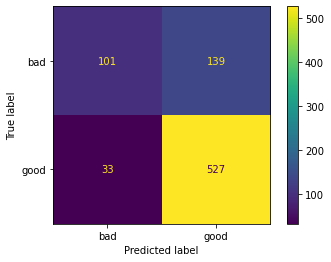

              precision    recall  f1-score   support

         bad       0.75      0.42      0.54       240
        good       0.79      0.94      0.86       560

    accuracy                           0.79       800
   macro avg       0.77      0.68      0.70       800
weighted avg       0.78      0.79      0.76       800


Métricas de avaliação de teste:
[[ 14  46]
 [ 20 120]]


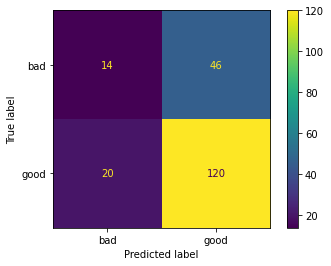

              precision    recall  f1-score   support

         bad       0.41      0.23      0.30        60
        good       0.72      0.86      0.78       140

    accuracy                           0.67       200
   macro avg       0.57      0.55      0.54       200
weighted avg       0.63      0.67      0.64       200



In [35]:
# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = grid_dt_random.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = grid_dt_random.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

In [36]:
# ver os melhores parametros
grid_dt_random.best_params_

{'dt__criterion': 'gini',
 'dt__min_impurity_decrease': 0.002246481205974149,
 'dt__splitter': 'best'}

In [37]:
grid_dt_random.best_estimator_["dt"]

DecisionTreeClassifier(min_impurity_decrease=0.002246481205974149,
                       random_state=42)

In [39]:
grid_dt_random.best_estimator_['dt'].get_depth()

9

In [40]:
results = pd.DataFrame(grid_dt_random.cv_results_)

In [41]:
results["param_dt__min_impurity_decrease"].astype(float).describe()

count    100.000000
mean       0.492571
std        0.290812
min        0.002246
25%        0.229711
50%        0.488784
75%        0.743783
max        0.989976
Name: param_dt__min_impurity_decrease, dtype: float64

Mudar o parâmetro da diminuição da impureza

In [42]:
# ============================================
# pipe com só uma etapa (modelagem), pq nao fizemos nada de preprocessamento

pipe = Pipeline([("dt", DecisionTreeClassifier(random_state=42))])

# ============================================

params_ditro_dt = {"dt__criterion" : ["gini", "entropy"],
                   "dt__splitter" : ["best", "random"],
                   "dt__min_impurity_decrease" : scipy.stats.uniform(0, 0.05)} 

splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_dt_random = RandomizedSearchCV(estimator=pipe,
                                     n_iter=100,
                                     param_distributions=params_ditro_dt,
                                     scoring="f1_weighted",
                                     cv=splitter,
                                     verbose=10)

grid_dt_random.fit(X_train, y_train)

# ============================================

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5; 1/100] START dt__criterion=gini, dt__min_impurity_decrease=0.035433537694331864, dt__splitter=random
[CV 1/5; 1/100] END dt__criterion=gini, dt__min_impurity_decrease=0.035433537694331864, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 2/5; 1/100] START dt__criterion=gini, dt__min_impurity_decrease=0.035433537694331864, dt__splitter=random
[CV 2/5; 1/100] END dt__criterion=gini, dt__min_impurity_decrease=0.035433537694331864, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 3/5; 1/100] START dt__criterion=gini, dt__min_impurity_decrease=0.035433537694331864, dt__splitter=random
[CV 3/5; 1/100] END dt__criterion=gini, dt__min_impurity_decrease=0.035433537694331864, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 4/5; 1/100] START dt__criterion=gini, dt__min_impurity_decrease=0.035433537694331864, dt__splitter=random
[CV 4/5; 1/100] END dt__criterion=gini, dt__min_impurity_decrease=0.035433

[CV 4/5; 7/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.004495338816031941, dt__splitter=best;, score=0.622 total time=   0.0s
[CV 5/5; 7/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.004495338816031941, dt__splitter=best
[CV 5/5; 7/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.004495338816031941, dt__splitter=best;, score=0.604 total time=   0.0s
[CV 1/5; 8/100] START dt__criterion=gini, dt__min_impurity_decrease=0.003027392386462813, dt__splitter=best
[CV 1/5; 8/100] END dt__criterion=gini, dt__min_impurity_decrease=0.003027392386462813, dt__splitter=best;, score=0.712 total time=   0.0s
[CV 2/5; 8/100] START dt__criterion=gini, dt__min_impurity_decrease=0.003027392386462813, dt__splitter=best
[CV 2/5; 8/100] END dt__criterion=gini, dt__min_impurity_decrease=0.003027392386462813, dt__splitter=best;, score=0.646 total time=   0.0s
[CV 3/5; 8/100] START dt__criterion=gini, dt__min_impurity_decrease=0.003027392386462813, dt__splitter=best
[CV

[CV 2/5; 14/100] END dt__criterion=gini, dt__min_impurity_decrease=0.02291883114642908, dt__splitter=best;, score=0.576 total time=   0.0s
[CV 3/5; 14/100] START dt__criterion=gini, dt__min_impurity_decrease=0.02291883114642908, dt__splitter=best
[CV 3/5; 14/100] END dt__criterion=gini, dt__min_impurity_decrease=0.02291883114642908, dt__splitter=best;, score=0.576 total time=   0.0s
[CV 4/5; 14/100] START dt__criterion=gini, dt__min_impurity_decrease=0.02291883114642908, dt__splitter=best
[CV 4/5; 14/100] END dt__criterion=gini, dt__min_impurity_decrease=0.02291883114642908, dt__splitter=best;, score=0.576 total time=   0.0s
[CV 5/5; 14/100] START dt__criterion=gini, dt__min_impurity_decrease=0.02291883114642908, dt__splitter=best
[CV 5/5; 14/100] END dt__criterion=gini, dt__min_impurity_decrease=0.02291883114642908, dt__splitter=best;, score=0.576 total time=   0.0s
[CV 1/5; 15/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.021638675485006083, dt__splitter=best
[CV 1/5;

[CV 2/5; 23/100] END dt__criterion=gini, dt__min_impurity_decrease=0.040496963819112886, dt__splitter=best;, score=0.576 total time=   0.0s
[CV 3/5; 23/100] START dt__criterion=gini, dt__min_impurity_decrease=0.040496963819112886, dt__splitter=best
[CV 3/5; 23/100] END dt__criterion=gini, dt__min_impurity_decrease=0.040496963819112886, dt__splitter=best;, score=0.576 total time=   0.0s
[CV 4/5; 23/100] START dt__criterion=gini, dt__min_impurity_decrease=0.040496963819112886, dt__splitter=best
[CV 4/5; 23/100] END dt__criterion=gini, dt__min_impurity_decrease=0.040496963819112886, dt__splitter=best;, score=0.576 total time=   0.0s
[CV 5/5; 23/100] START dt__criterion=gini, dt__min_impurity_decrease=0.040496963819112886, dt__splitter=best
[CV 5/5; 23/100] END dt__criterion=gini, dt__min_impurity_decrease=0.040496963819112886, dt__splitter=best;, score=0.576 total time=   0.0s
[CV 1/5; 24/100] START dt__criterion=gini, dt__min_impurity_decrease=0.036984444481274054, dt__splitter=random
[C

[CV 1/5; 32/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.008283235609755501, dt__splitter=best;, score=0.712 total time=   0.0s
[CV 2/5; 32/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.008283235609755501, dt__splitter=best
[CV 2/5; 32/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.008283235609755501, dt__splitter=best;, score=0.665 total time=   0.0s
[CV 3/5; 32/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.008283235609755501, dt__splitter=best
[CV 3/5; 32/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.008283235609755501, dt__splitter=best;, score=0.623 total time=   0.0s
[CV 4/5; 32/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.008283235609755501, dt__splitter=best
[CV 4/5; 32/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.008283235609755501, dt__splitter=best;, score=0.669 total time=   0.0s
[CV 5/5; 32/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.008283235609755501

[CV 1/5; 40/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.009722433508532885, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 2/5; 40/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.009722433508532885, dt__splitter=random
[CV 2/5; 40/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.009722433508532885, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 3/5; 40/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.009722433508532885, dt__splitter=random
[CV 3/5; 40/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.009722433508532885, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 4/5; 40/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.009722433508532885, dt__splitter=random
[CV 4/5; 40/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.009722433508532885, dt__splitter=random;, score=0.619 total time=   0.0s
[CV 5/5; 40/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.0097

[CV 5/5; 46/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.014733146919245228, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 1/5; 47/100] START dt__criterion=gini, dt__min_impurity_decrease=0.01829508702313692, dt__splitter=best
[CV 1/5; 47/100] END dt__criterion=gini, dt__min_impurity_decrease=0.01829508702313692, dt__splitter=best;, score=0.576 total time=   0.0s
[CV 2/5; 47/100] START dt__criterion=gini, dt__min_impurity_decrease=0.01829508702313692, dt__splitter=best
[CV 2/5; 47/100] END dt__criterion=gini, dt__min_impurity_decrease=0.01829508702313692, dt__splitter=best;, score=0.576 total time=   0.0s
[CV 3/5; 47/100] START dt__criterion=gini, dt__min_impurity_decrease=0.01829508702313692, dt__splitter=best
[CV 3/5; 47/100] END dt__criterion=gini, dt__min_impurity_decrease=0.01829508702313692, dt__splitter=best;, score=0.623 total time=   0.0s
[CV 4/5; 47/100] START dt__criterion=gini, dt__min_impurity_decrease=0.01829508702313692, dt__splitter=best
[CV 4/

[CV 5/5; 54/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.044289972522023095, dt__splitter=best;, score=0.576 total time=   0.0s
[CV 1/5; 55/100] START dt__criterion=gini, dt__min_impurity_decrease=0.03226443919985974, dt__splitter=random
[CV 1/5; 55/100] END dt__criterion=gini, dt__min_impurity_decrease=0.03226443919985974, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 2/5; 55/100] START dt__criterion=gini, dt__min_impurity_decrease=0.03226443919985974, dt__splitter=random
[CV 2/5; 55/100] END dt__criterion=gini, dt__min_impurity_decrease=0.03226443919985974, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 3/5; 55/100] START dt__criterion=gini, dt__min_impurity_decrease=0.03226443919985974, dt__splitter=random
[CV 3/5; 55/100] END dt__criterion=gini, dt__min_impurity_decrease=0.03226443919985974, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 4/5; 55/100] START dt__criterion=gini, dt__min_impurity_decrease=0.03226443919985974, dt__splitter=r

[CV 3/5; 62/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.04204639509067988, dt__splitter=best;, score=0.576 total time=   0.0s
[CV 4/5; 62/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.04204639509067988, dt__splitter=best
[CV 4/5; 62/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.04204639509067988, dt__splitter=best;, score=0.576 total time=   0.0s
[CV 5/5; 62/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.04204639509067988, dt__splitter=best
[CV 5/5; 62/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.04204639509067988, dt__splitter=best;, score=0.576 total time=   0.0s
[CV 1/5; 63/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.018274760490571307, dt__splitter=random
[CV 1/5; 63/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.018274760490571307, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 2/5; 63/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.018274760490571307,

[CV 4/5; 69/100] END dt__criterion=gini, dt__min_impurity_decrease=0.04995253799228781, dt__splitter=best;, score=0.576 total time=   0.0s
[CV 5/5; 69/100] START dt__criterion=gini, dt__min_impurity_decrease=0.04995253799228781, dt__splitter=best
[CV 5/5; 69/100] END dt__criterion=gini, dt__min_impurity_decrease=0.04995253799228781, dt__splitter=best;, score=0.576 total time=   0.0s
[CV 1/5; 70/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.02039282212037923, dt__splitter=best
[CV 1/5; 70/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.02039282212037923, dt__splitter=best;, score=0.576 total time=   0.0s
[CV 2/5; 70/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.02039282212037923, dt__splitter=best
[CV 2/5; 70/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.02039282212037923, dt__splitter=best;, score=0.646 total time=   0.0s
[CV 3/5; 70/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.02039282212037923, dt__splitter=be

[CV 4/5; 76/100] END dt__criterion=gini, dt__min_impurity_decrease=0.02566410346431297, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 5/5; 76/100] START dt__criterion=gini, dt__min_impurity_decrease=0.02566410346431297, dt__splitter=random
[CV 5/5; 76/100] END dt__criterion=gini, dt__min_impurity_decrease=0.02566410346431297, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 1/5; 77/100] START dt__criterion=gini, dt__min_impurity_decrease=0.04515269798747865, dt__splitter=random
[CV 1/5; 77/100] END dt__criterion=gini, dt__min_impurity_decrease=0.04515269798747865, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 2/5; 77/100] START dt__criterion=gini, dt__min_impurity_decrease=0.04515269798747865, dt__splitter=random
[CV 2/5; 77/100] END dt__criterion=gini, dt__min_impurity_decrease=0.04515269798747865, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 3/5; 77/100] START dt__criterion=gini, dt__min_impurity_decrease=0.04515269798747865, dt__splitter=ran

[CV 5/5; 83/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.027050403767528444, dt__splitter=best;, score=0.576 total time=   0.0s
[CV 1/5; 84/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.033307696383135896, dt__splitter=random
[CV 1/5; 84/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.033307696383135896, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 2/5; 84/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.033307696383135896, dt__splitter=random
[CV 2/5; 84/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.033307696383135896, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 3/5; 84/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.033307696383135896, dt__splitter=random
[CV 3/5; 84/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.033307696383135896, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 4/5; 84/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.033307

[CV 2/5; 91/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.02435170726044817, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 3/5; 91/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.02435170726044817, dt__splitter=random
[CV 3/5; 91/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.02435170726044817, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 4/5; 91/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.02435170726044817, dt__splitter=random
[CV 4/5; 91/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.02435170726044817, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 5/5; 91/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.02435170726044817, dt__splitter=random
[CV 5/5; 91/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.02435170726044817, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 1/5; 92/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.04002509680

[CV 2/5; 98/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.009463329791386189, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 3/5; 98/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.009463329791386189, dt__splitter=random
[CV 3/5; 98/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.009463329791386189, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 4/5; 98/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.009463329791386189, dt__splitter=random
[CV 4/5; 98/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.009463329791386189, dt__splitter=random;, score=0.619 total time=   0.0s
[CV 5/5; 98/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.009463329791386189, dt__splitter=random
[CV 5/5; 98/100] END dt__criterion=entropy, dt__min_impurity_decrease=0.009463329791386189, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 1/5; 99/100] START dt__criterion=entropy, dt__min_impurity_decrease=0.0412

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('dt',
                                              DecisionTreeClassifier(random_state=42))]),
                   n_iter=100,
                   param_distributions={'dt__criterion': ['gini', 'entropy'],
                                        'dt__min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000188497CD1E0>,
                                        'dt__splitter': ['best', 'random']},
                   scoring='f1_weighted', verbose=10)

In [43]:
grid_dt_random.best_params_

{'dt__criterion': 'entropy',
 'dt__min_impurity_decrease': 0.007558723646574794,
 'dt__splitter': 'best'}

In [44]:
grid_dt_random.best_estimator_["dt"].get_depth()

7

In [45]:
grid_dt_random.best_score_

0.6686703645772493


Métricas de avaliação de treino:
[[ 76 164]
 [ 40 520]]


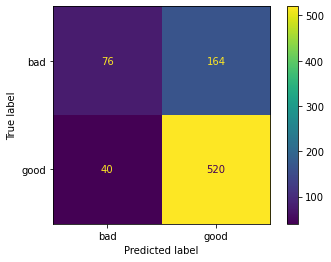

              precision    recall  f1-score   support

         bad       0.66      0.32      0.43       240
        good       0.76      0.93      0.84       560

    accuracy                           0.74       800
   macro avg       0.71      0.62      0.63       800
weighted avg       0.73      0.74      0.71       800


Métricas de avaliação de teste:
[[ 15  45]
 [ 17 123]]


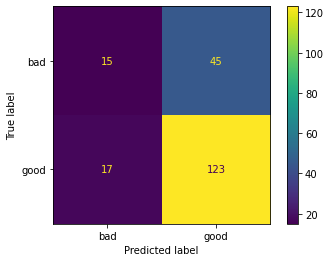

              precision    recall  f1-score   support

         bad       0.47      0.25      0.33        60
        good       0.73      0.88      0.80       140

    accuracy                           0.69       200
   macro avg       0.60      0.56      0.56       200
weighted avg       0.65      0.69      0.66       200



In [46]:
# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = grid_dt_random.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = grid_dt_random.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

In [47]:
# Quero melhorar mais um pouquinho

# ============================================
# pipe com só uma etapa (modelagem), pq nao fizemos nada de preprocessamento

pipe = Pipeline([("dt", DecisionTreeClassifier(random_state=42))])

# ============================================

params_ditro_dt = {"dt__criterion" : ["gini", "entropy"],
                   "dt__splitter" : ["best", "random"],
                   "dt__min_impurity_decrease" : scipy.stats.uniform(0, 0.01)} 

splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_dt_random = RandomizedSearchCV(estimator=pipe,
                                     n_iter=500,
                                     param_distributions=params_ditro_dt,
                                     scoring="f1_weighted",
                                     cv=splitter,
                                     verbose=10)

grid_dt_random.fit(X_train, y_train)

# ============================================

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
[CV 1/5; 1/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.007859039667389926, dt__splitter=best
[CV 1/5; 1/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.007859039667389926, dt__splitter=best;, score=0.712 total time=   0.0s
[CV 2/5; 1/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.007859039667389926, dt__splitter=best
[CV 2/5; 1/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.007859039667389926, dt__splitter=best;, score=0.665 total time=   0.0s
[CV 3/5; 1/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.007859039667389926, dt__splitter=best
[CV 3/5; 1/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.007859039667389926, dt__splitter=best;, score=0.623 total time=   0.0s
[CV 4/5; 1/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.007859039667389926, dt__splitter=best
[CV 4/5; 1/500] END dt__criterion=entropy, dt__min_impurity_decrea

[CV 3/5; 9/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.009041938726205062, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 4/5; 9/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.009041938726205062, dt__splitter=random
[CV 4/5; 9/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.009041938726205062, dt__splitter=random;, score=0.619 total time=   0.0s
[CV 5/5; 9/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.009041938726205062, dt__splitter=random
[CV 5/5; 9/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.009041938726205062, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 1/5; 10/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.007805413661234716, dt__splitter=random
[CV 1/5; 10/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.007805413661234716, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 2/5; 10/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.007805413

[CV 1/5; 17/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0050951889466535885, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 2/5; 17/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0050951889466535885, dt__splitter=random
[CV 2/5; 17/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0050951889466535885, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 3/5; 17/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0050951889466535885, dt__splitter=random
[CV 3/5; 17/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0050951889466535885, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 4/5; 17/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0050951889466535885, dt__splitter=random
[CV 4/5; 17/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0050951889466535885, dt__splitter=random;, score=0.619 total time=   0.0s
[CV 5/5; 17/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0050951889466535885, 

[CV 2/5; 25/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0050622008667861465, dt__splitter=best;, score=0.665 total time=   0.0s
[CV 3/5; 25/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0050622008667861465, dt__splitter=best
[CV 3/5; 25/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0050622008667861465, dt__splitter=best;, score=0.616 total time=   0.0s
[CV 4/5; 25/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0050622008667861465, dt__splitter=best
[CV 4/5; 25/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0050622008667861465, dt__splitter=best;, score=0.648 total time=   0.0s
[CV 5/5; 25/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0050622008667861465, dt__splitter=best
[CV 5/5; 25/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0050622008667861465, dt__splitter=best;, score=0.674 total time=   0.0s
[CV 1/5; 26/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.00938715896036715, dt__splitter=

[CV 5/5; 32/500] END dt__criterion=gini, dt__min_impurity_decrease=0.008696203621330365, dt__splitter=best;, score=0.619 total time=   0.0s
[CV 1/5; 33/500] START dt__criterion=gini, dt__min_impurity_decrease=0.008985190084454028, dt__splitter=random
[CV 1/5; 33/500] END dt__criterion=gini, dt__min_impurity_decrease=0.008985190084454028, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 2/5; 33/500] START dt__criterion=gini, dt__min_impurity_decrease=0.008985190084454028, dt__splitter=random
[CV 2/5; 33/500] END dt__criterion=gini, dt__min_impurity_decrease=0.008985190084454028, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 3/5; 33/500] START dt__criterion=gini, dt__min_impurity_decrease=0.008985190084454028, dt__splitter=random
[CV 3/5; 33/500] END dt__criterion=gini, dt__min_impurity_decrease=0.008985190084454028, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 4/5; 33/500] START dt__criterion=gini, dt__min_impurity_decrease=0.008985190084454028, dt__splitt

[CV 3/5; 40/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.009812860640866233, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 4/5; 40/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.009812860640866233, dt__splitter=random
[CV 4/5; 40/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.009812860640866233, dt__splitter=random;, score=0.619 total time=   0.0s
[CV 5/5; 40/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.009812860640866233, dt__splitter=random
[CV 5/5; 40/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.009812860640866233, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 1/5; 41/500] START dt__criterion=gini, dt__min_impurity_decrease=0.005297619829607902, dt__splitter=random
[CV 1/5; 41/500] END dt__criterion=gini, dt__min_impurity_decrease=0.005297619829607902, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 2/5; 41/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0052976198296

[CV 3/5; 47/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0034440029465269994, dt__splitter=best;, score=0.612 total time=   0.0s
[CV 4/5; 47/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0034440029465269994, dt__splitter=best
[CV 4/5; 47/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0034440029465269994, dt__splitter=best;, score=0.680 total time=   0.0s
[CV 5/5; 47/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0034440029465269994, dt__splitter=best
[CV 5/5; 47/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0034440029465269994, dt__splitter=best;, score=0.674 total time=   0.0s
[CV 1/5; 48/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.00592386035532949, dt__splitter=best
[CV 1/5; 48/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.00592386035532949, dt__splitter=best;, score=0.692 total time=   0.0s
[CV 2/5; 48/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.00592386035532949, dt__splitte

[CV 3/5; 55/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0018544162527977472, dt__splitter=best;, score=0.641 total time=   0.0s
[CV 4/5; 55/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0018544162527977472, dt__splitter=best
[CV 4/5; 55/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0018544162527977472, dt__splitter=best;, score=0.624 total time=   0.0s
[CV 5/5; 55/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0018544162527977472, dt__splitter=best
[CV 5/5; 55/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0018544162527977472, dt__splitter=best;, score=0.663 total time=   0.0s
[CV 1/5; 56/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0005001233130237504, dt__splitter=best
[CV 1/5; 56/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0005001233130237504, dt__splitter=best;, score=0.636 total time=   0.0s
[CV 2/5; 56/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0005001233130237504, dt__splitter=b

[CV 4/5; 63/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0001503067537709102, dt__splitter=random;, score=0.625 total time=   0.0s
[CV 5/5; 63/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0001503067537709102, dt__splitter=random
[CV 5/5; 63/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0001503067537709102, dt__splitter=random;, score=0.615 total time=   0.0s
[CV 1/5; 64/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.007891032336995164, dt__splitter=best
[CV 1/5; 64/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.007891032336995164, dt__splitter=best;, score=0.712 total time=   0.0s
[CV 2/5; 64/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.007891032336995164, dt__splitter=best
[CV 2/5; 64/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.007891032336995164, dt__splitter=best;, score=0.665 total time=   0.0s
[CV 3/5; 64/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.007891032

[CV 3/5; 70/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.003912963297683265, dt__splitter=random;, score=0.584 total time=   0.0s
[CV 4/5; 70/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.003912963297683265, dt__splitter=random
[CV 4/5; 70/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.003912963297683265, dt__splitter=random;, score=0.628 total time=   0.0s
[CV 5/5; 70/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.003912963297683265, dt__splitter=random
[CV 5/5; 70/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.003912963297683265, dt__splitter=random;, score=0.581 total time=   0.0s
[CV 1/5; 71/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.005335681671372118, dt__splitter=random
[CV 1/5; 71/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.005335681671372118, dt__splitter=random;, score=0.688 total time=   0.0s
[CV 2/5; 71/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0053

[CV 1/5; 77/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.005896593773112624, dt__splitter=best;, score=0.692 total time=   0.0s
[CV 2/5; 77/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.005896593773112624, dt__splitter=best
[CV 2/5; 77/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.005896593773112624, dt__splitter=best;, score=0.645 total time=   0.0s
[CV 3/5; 77/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.005896593773112624, dt__splitter=best
[CV 3/5; 77/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.005896593773112624, dt__splitter=best;, score=0.633 total time=   0.0s
[CV 4/5; 77/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.005896593773112624, dt__splitter=best
[CV 4/5; 77/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.005896593773112624, dt__splitter=best;, score=0.670 total time=   0.0s
[CV 5/5; 77/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.005896593773112624

[CV 4/5; 84/500] END dt__criterion=gini, dt__min_impurity_decrease=0.00901949441443364, dt__splitter=best;, score=0.641 total time=   0.0s
[CV 5/5; 84/500] START dt__criterion=gini, dt__min_impurity_decrease=0.00901949441443364, dt__splitter=best
[CV 5/5; 84/500] END dt__criterion=gini, dt__min_impurity_decrease=0.00901949441443364, dt__splitter=best;, score=0.619 total time=   0.0s
[CV 1/5; 85/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.007525428448923851, dt__splitter=best
[CV 1/5; 85/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.007525428448923851, dt__splitter=best;, score=0.712 total time=   0.0s
[CV 2/5; 85/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.007525428448923851, dt__splitter=best
[CV 2/5; 85/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.007525428448923851, dt__splitter=best;, score=0.665 total time=   0.0s
[CV 3/5; 85/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.007525428448923851, dt__splitt

[CV 3/5; 91/500] END dt__criterion=gini, dt__min_impurity_decrease=0.009635310322056901, dt__splitter=best;, score=0.581 total time=   0.0s
[CV 4/5; 91/500] START dt__criterion=gini, dt__min_impurity_decrease=0.009635310322056901, dt__splitter=best
[CV 4/5; 91/500] END dt__criterion=gini, dt__min_impurity_decrease=0.009635310322056901, dt__splitter=best;, score=0.641 total time=   0.0s
[CV 5/5; 91/500] START dt__criterion=gini, dt__min_impurity_decrease=0.009635310322056901, dt__splitter=best
[CV 5/5; 91/500] END dt__criterion=gini, dt__min_impurity_decrease=0.009635310322056901, dt__splitter=best;, score=0.619 total time=   0.0s
[CV 1/5; 92/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0034195003093136045, dt__splitter=random
[CV 1/5; 92/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0034195003093136045, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 2/5; 92/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0034195003093136045, dt__sp

[CV 1/5; 99/500] END dt__criterion=gini, dt__min_impurity_decrease=0.009093513187047954, dt__splitter=best;, score=0.573 total time=   0.0s
[CV 2/5; 99/500] START dt__criterion=gini, dt__min_impurity_decrease=0.009093513187047954, dt__splitter=best
[CV 2/5; 99/500] END dt__criterion=gini, dt__min_impurity_decrease=0.009093513187047954, dt__splitter=best;, score=0.654 total time=   0.0s
[CV 3/5; 99/500] START dt__criterion=gini, dt__min_impurity_decrease=0.009093513187047954, dt__splitter=best
[CV 3/5; 99/500] END dt__criterion=gini, dt__min_impurity_decrease=0.009093513187047954, dt__splitter=best;, score=0.581 total time=   0.0s
[CV 4/5; 99/500] START dt__criterion=gini, dt__min_impurity_decrease=0.009093513187047954, dt__splitter=best
[CV 4/5; 99/500] END dt__criterion=gini, dt__min_impurity_decrease=0.009093513187047954, dt__splitter=best;, score=0.641 total time=   0.0s
[CV 5/5; 99/500] START dt__criterion=gini, dt__min_impurity_decrease=0.009093513187047954, dt__splitter=best
[CV 

[CV 3/5; 107/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0023908018293967857, dt__splitter=random;, score=0.610 total time=   0.0s
[CV 4/5; 107/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0023908018293967857, dt__splitter=random
[CV 4/5; 107/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0023908018293967857, dt__splitter=random;, score=0.616 total time=   0.0s
[CV 5/5; 107/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0023908018293967857, dt__splitter=random
[CV 5/5; 107/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0023908018293967857, dt__splitter=random;, score=0.581 total time=   0.0s
[CV 1/5; 108/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0016132494225955729, dt__splitter=best
[CV 1/5; 108/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0016132494225955729, dt__splitter=best;, score=0.670 total time=   0.0s
[CV 2/5; 108/500] START dt__criterion=entropy, dt__min_impurity_decr

[CV 5/5; 114/500] END dt__criterion=gini, dt__min_impurity_decrease=0.008077167055917924, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 1/5; 115/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.004528792045449367, dt__splitter=best
[CV 1/5; 115/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.004528792045449367, dt__splitter=best;, score=0.691 total time=   0.0s
[CV 2/5; 115/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.004528792045449367, dt__splitter=best
[CV 2/5; 115/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.004528792045449367, dt__splitter=best;, score=0.623 total time=   0.0s
[CV 3/5; 115/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.004528792045449367, dt__splitter=best
[CV 3/5; 115/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.004528792045449367, dt__splitter=best;, score=0.641 total time=   0.0s
[CV 4/5; 115/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.00452879204

[CV 2/5; 122/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.009702267714195545, dt__splitter=best;, score=0.632 total time=   0.0s
[CV 3/5; 122/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.009702267714195545, dt__splitter=best
[CV 3/5; 122/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.009702267714195545, dt__splitter=best;, score=0.607 total time=   0.0s
[CV 4/5; 122/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.009702267714195545, dt__splitter=best
[CV 4/5; 122/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.009702267714195545, dt__splitter=best;, score=0.648 total time=   0.0s
[CV 5/5; 122/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.009702267714195545, dt__splitter=best
[CV 5/5; 122/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.009702267714195545, dt__splitter=best;, score=0.584 total time=   0.0s
[CV 1/5; 123/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0036733259

[CV 1/5; 129/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0009023127223980276, dt__splitter=best;, score=0.675 total time=   0.0s
[CV 2/5; 129/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0009023127223980276, dt__splitter=best
[CV 2/5; 129/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0009023127223980276, dt__splitter=best;, score=0.610 total time=   0.0s
[CV 3/5; 129/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0009023127223980276, dt__splitter=best
[CV 3/5; 129/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0009023127223980276, dt__splitter=best;, score=0.603 total time=   0.0s
[CV 4/5; 129/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0009023127223980276, dt__splitter=best
[CV 4/5; 129/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0009023127223980276, dt__splitter=best;, score=0.648 total time=   0.0s
[CV 5/5; 129/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.000

[CV 4/5; 135/500] END dt__criterion=gini, dt__min_impurity_decrease=0.009693195518175964, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 5/5; 135/500] START dt__criterion=gini, dt__min_impurity_decrease=0.009693195518175964, dt__splitter=random
[CV 5/5; 135/500] END dt__criterion=gini, dt__min_impurity_decrease=0.009693195518175964, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 1/5; 136/500] START dt__criterion=gini, dt__min_impurity_decrease=0.009185881848105452, dt__splitter=best
[CV 1/5; 136/500] END dt__criterion=gini, dt__min_impurity_decrease=0.009185881848105452, dt__splitter=best;, score=0.573 total time=   0.0s
[CV 2/5; 136/500] START dt__criterion=gini, dt__min_impurity_decrease=0.009185881848105452, dt__splitter=best
[CV 2/5; 136/500] END dt__criterion=gini, dt__min_impurity_decrease=0.009185881848105452, dt__splitter=best;, score=0.654 total time=   0.0s
[CV 3/5; 136/500] START dt__criterion=gini, dt__min_impurity_decrease=0.009185881848105452, dt__spli

[CV 4/5; 142/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0013203641795048971, dt__splitter=best;, score=0.645 total time=   0.0s
[CV 5/5; 142/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0013203641795048971, dt__splitter=best
[CV 5/5; 142/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0013203641795048971, dt__splitter=best;, score=0.681 total time=   0.0s
[CV 1/5; 143/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0052559756464951755, dt__splitter=random
[CV 1/5; 143/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0052559756464951755, dt__splitter=random;, score=0.688 total time=   0.0s
[CV 2/5; 143/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0052559756464951755, dt__splitter=random
[CV 2/5; 143/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0052559756464951755, dt__splitter=random;, score=0.644 total time=   0.0s
[CV 3/5; 143/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0052

[CV 1/5; 151/500] END dt__criterion=gini, dt__min_impurity_decrease=0.006770369236927129, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 2/5; 151/500] START dt__criterion=gini, dt__min_impurity_decrease=0.006770369236927129, dt__splitter=random
[CV 2/5; 151/500] END dt__criterion=gini, dt__min_impurity_decrease=0.006770369236927129, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 3/5; 151/500] START dt__criterion=gini, dt__min_impurity_decrease=0.006770369236927129, dt__splitter=random
[CV 3/5; 151/500] END dt__criterion=gini, dt__min_impurity_decrease=0.006770369236927129, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 4/5; 151/500] START dt__criterion=gini, dt__min_impurity_decrease=0.006770369236927129, dt__splitter=random
[CV 4/5; 151/500] END dt__criterion=gini, dt__min_impurity_decrease=0.006770369236927129, dt__splitter=random;, score=0.619 total time=   0.0s
[CV 5/5; 151/500] START dt__criterion=gini, dt__min_impurity_decrease=0.006770369236927129, 

[CV 2/5; 159/500] END dt__criterion=gini, dt__min_impurity_decrease=0.003627192220053128, dt__splitter=best;, score=0.665 total time=   0.0s
[CV 3/5; 159/500] START dt__criterion=gini, dt__min_impurity_decrease=0.003627192220053128, dt__splitter=best
[CV 3/5; 159/500] END dt__criterion=gini, dt__min_impurity_decrease=0.003627192220053128, dt__splitter=best;, score=0.612 total time=   0.0s
[CV 4/5; 159/500] START dt__criterion=gini, dt__min_impurity_decrease=0.003627192220053128, dt__splitter=best
[CV 4/5; 159/500] END dt__criterion=gini, dt__min_impurity_decrease=0.003627192220053128, dt__splitter=best;, score=0.680 total time=   0.0s
[CV 5/5; 159/500] START dt__criterion=gini, dt__min_impurity_decrease=0.003627192220053128, dt__splitter=best
[CV 5/5; 159/500] END dt__criterion=gini, dt__min_impurity_decrease=0.003627192220053128, dt__splitter=best;, score=0.674 total time=   0.0s
[CV 1/5; 160/500] START dt__criterion=gini, dt__min_impurity_decrease=0.002067473372490023, dt__splitter=r

[CV 2/5; 166/500] END dt__criterion=gini, dt__min_impurity_decrease=0.007361449138616249, dt__splitter=best;, score=0.655 total time=   0.0s
[CV 3/5; 166/500] START dt__criterion=gini, dt__min_impurity_decrease=0.007361449138616249, dt__splitter=best
[CV 3/5; 166/500] END dt__criterion=gini, dt__min_impurity_decrease=0.007361449138616249, dt__splitter=best;, score=0.607 total time=   0.0s
[CV 4/5; 166/500] START dt__criterion=gini, dt__min_impurity_decrease=0.007361449138616249, dt__splitter=best
[CV 4/5; 166/500] END dt__criterion=gini, dt__min_impurity_decrease=0.007361449138616249, dt__splitter=best;, score=0.641 total time=   0.0s
[CV 5/5; 166/500] START dt__criterion=gini, dt__min_impurity_decrease=0.007361449138616249, dt__splitter=best
[CV 5/5; 166/500] END dt__criterion=gini, dt__min_impurity_decrease=0.007361449138616249, dt__splitter=best;, score=0.619 total time=   0.0s
[CV 1/5; 167/500] START dt__criterion=gini, dt__min_impurity_decrease=0.007116031005948271, dt__splitter=r

[CV 5/5; 172/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.004536519729368772, dt__splitter=best;, score=0.604 total time=   0.0s
[CV 1/5; 173/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.008310992228736533, dt__splitter=random
[CV 1/5; 173/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.008310992228736533, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 2/5; 173/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.008310992228736533, dt__splitter=random
[CV 2/5; 173/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.008310992228736533, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 3/5; 173/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.008310992228736533, dt__splitter=random
[CV 3/5; 173/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.008310992228736533, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 4/5; 173/500] START dt__criterion=entropy, dt__min_impurity_decrease=

[CV 1/5; 180/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0014589414092775132, dt__splitter=best;, score=0.677 total time=   0.0s
[CV 2/5; 180/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0014589414092775132, dt__splitter=best
[CV 2/5; 180/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0014589414092775132, dt__splitter=best;, score=0.620 total time=   0.0s
[CV 3/5; 180/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0014589414092775132, dt__splitter=best
[CV 3/5; 180/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0014589414092775132, dt__splitter=best;, score=0.607 total time=   0.0s
[CV 4/5; 180/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0014589414092775132, dt__splitter=best
[CV 4/5; 180/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0014589414092775132, dt__splitter=best;, score=0.637 total time=   0.0s
[CV 5/5; 180/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.001

[CV 4/5; 186/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0008643853902983778, dt__splitter=best;, score=0.610 total time=   0.0s
[CV 5/5; 186/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0008643853902983778, dt__splitter=best
[CV 5/5; 186/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0008643853902983778, dt__splitter=best;, score=0.661 total time=   0.0s
[CV 1/5; 187/500] START dt__criterion=gini, dt__min_impurity_decrease=7.806684773877693e-05, dt__splitter=random
[CV 1/5; 187/500] END dt__criterion=gini, dt__min_impurity_decrease=7.806684773877693e-05, dt__splitter=random;, score=0.673 total time=   0.0s
[CV 2/5; 187/500] START dt__criterion=gini, dt__min_impurity_decrease=7.806684773877693e-05, dt__splitter=random
[CV 2/5; 187/500] END dt__criterion=gini, dt__min_impurity_decrease=7.806684773877693e-05, dt__splitter=random;, score=0.657 total time=   0.0s
[CV 3/5; 187/500] START dt__criterion=gini, dt__min_impurity_decrease=7.806684773877693e-05

[CV 3/5; 195/500] END dt__criterion=gini, dt__min_impurity_decrease=0.00677920974547797, dt__splitter=best;, score=0.607 total time=   0.0s
[CV 4/5; 195/500] START dt__criterion=gini, dt__min_impurity_decrease=0.00677920974547797, dt__splitter=best
[CV 4/5; 195/500] END dt__criterion=gini, dt__min_impurity_decrease=0.00677920974547797, dt__splitter=best;, score=0.648 total time=   0.0s
[CV 5/5; 195/500] START dt__criterion=gini, dt__min_impurity_decrease=0.00677920974547797, dt__splitter=best
[CV 5/5; 195/500] END dt__criterion=gini, dt__min_impurity_decrease=0.00677920974547797, dt__splitter=best;, score=0.619 total time=   0.0s
[CV 1/5; 196/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.008568089540508632, dt__splitter=random
[CV 1/5; 196/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.008568089540508632, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 2/5; 196/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.008568089540508632, dt__sp

[CV 3/5; 202/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0067235448958736024, dt__splitter=best;, score=0.633 total time=   0.0s
[CV 4/5; 202/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0067235448958736024, dt__splitter=best
[CV 4/5; 202/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0067235448958736024, dt__splitter=best;, score=0.659 total time=   0.0s
[CV 5/5; 202/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0067235448958736024, dt__splitter=best
[CV 5/5; 202/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0067235448958736024, dt__splitter=best;, score=0.674 total time=   0.0s
[CV 1/5; 203/500] START dt__criterion=gini, dt__min_impurity_decrease=0.007007906779730432, dt__splitter=random
[CV 1/5; 203/500] END dt__criterion=gini, dt__min_impurity_decrease=0.007007906779730432, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 2/5; 203/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0070079067

[CV 3/5; 211/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.005334246992556162, dt__splitter=best;, score=0.633 total time=   0.0s
[CV 4/5; 211/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.005334246992556162, dt__splitter=best
[CV 4/5; 211/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.005334246992556162, dt__splitter=best;, score=0.658 total time=   0.0s
[CV 5/5; 211/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.005334246992556162, dt__splitter=best
[CV 5/5; 211/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.005334246992556162, dt__splitter=best;, score=0.612 total time=   0.0s
[CV 1/5; 212/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.002636192047415571, dt__splitter=random
[CV 1/5; 212/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.002636192047415571, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 2/5; 212/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.002636

[CV 4/5; 218/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0053863794140128094, dt__splitter=best;, score=0.648 total time=   0.0s
[CV 5/5; 218/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0053863794140128094, dt__splitter=best
[CV 5/5; 218/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0053863794140128094, dt__splitter=best;, score=0.584 total time=   0.0s
[CV 1/5; 219/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.00943058994901554, dt__splitter=best
[CV 1/5; 219/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.00943058994901554, dt__splitter=best;, score=0.672 total time=   0.0s
[CV 2/5; 219/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.00943058994901554, dt__splitter=best
[CV 2/5; 219/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.00943058994901554, dt__splitter=best;, score=0.632 total time=   0.0s
[CV 3/5; 219/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.00943058994901554, d

[CV 2/5; 226/500] END dt__criterion=gini, dt__min_impurity_decrease=0.00020360835626027197, dt__splitter=best;, score=0.613 total time=   0.0s
[CV 3/5; 226/500] START dt__criterion=gini, dt__min_impurity_decrease=0.00020360835626027197, dt__splitter=best
[CV 3/5; 226/500] END dt__criterion=gini, dt__min_impurity_decrease=0.00020360835626027197, dt__splitter=best;, score=0.585 total time=   0.0s
[CV 4/5; 226/500] START dt__criterion=gini, dt__min_impurity_decrease=0.00020360835626027197, dt__splitter=best
[CV 4/5; 226/500] END dt__criterion=gini, dt__min_impurity_decrease=0.00020360835626027197, dt__splitter=best;, score=0.615 total time=   0.0s
[CV 5/5; 226/500] START dt__criterion=gini, dt__min_impurity_decrease=0.00020360835626027197, dt__splitter=best
[CV 5/5; 226/500] END dt__criterion=gini, dt__min_impurity_decrease=0.00020360835626027197, dt__splitter=best;, score=0.652 total time=   0.0s
[CV 1/5; 227/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.00880560935640145

[CV 5/5; 233/500] END dt__criterion=gini, dt__min_impurity_decrease=0.002807652694659194, dt__splitter=best;, score=0.594 total time=   0.0s
[CV 1/5; 234/500] START dt__criterion=gini, dt__min_impurity_decrease=0.006458297487497632, dt__splitter=random
[CV 1/5; 234/500] END dt__criterion=gini, dt__min_impurity_decrease=0.006458297487497632, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 2/5; 234/500] START dt__criterion=gini, dt__min_impurity_decrease=0.006458297487497632, dt__splitter=random
[CV 2/5; 234/500] END dt__criterion=gini, dt__min_impurity_decrease=0.006458297487497632, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 3/5; 234/500] START dt__criterion=gini, dt__min_impurity_decrease=0.006458297487497632, dt__splitter=random
[CV 3/5; 234/500] END dt__criterion=gini, dt__min_impurity_decrease=0.006458297487497632, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 4/5; 234/500] START dt__criterion=gini, dt__min_impurity_decrease=0.006458297487497632, dt

[CV 5/5; 240/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0013011872184839214, dt__splitter=best;, score=0.630 total time=   0.0s
[CV 1/5; 241/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.009770901779604435, dt__splitter=best
[CV 1/5; 241/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.009770901779604435, dt__splitter=best;, score=0.672 total time=   0.0s
[CV 2/5; 241/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.009770901779604435, dt__splitter=best
[CV 2/5; 241/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.009770901779604435, dt__splitter=best;, score=0.632 total time=   0.0s
[CV 3/5; 241/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.009770901779604435, dt__splitter=best
[CV 3/5; 241/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.009770901779604435, dt__splitter=best;, score=0.607 total time=   0.0s
[CV 4/5; 241/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.009770901

[CV 2/5; 247/500] END dt__criterion=gini, dt__min_impurity_decrease=0.00493655220801699, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 3/5; 247/500] START dt__criterion=gini, dt__min_impurity_decrease=0.00493655220801699, dt__splitter=random
[CV 3/5; 247/500] END dt__criterion=gini, dt__min_impurity_decrease=0.00493655220801699, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 4/5; 247/500] START dt__criterion=gini, dt__min_impurity_decrease=0.00493655220801699, dt__splitter=random
[CV 4/5; 247/500] END dt__criterion=gini, dt__min_impurity_decrease=0.00493655220801699, dt__splitter=random;, score=0.619 total time=   0.0s
[CV 5/5; 247/500] START dt__criterion=gini, dt__min_impurity_decrease=0.00493655220801699, dt__splitter=random
[CV 5/5; 247/500] END dt__criterion=gini, dt__min_impurity_decrease=0.00493655220801699, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 1/5; 248/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0007441509358665554, dt__sp

[CV 4/5; 255/500] END dt__criterion=gini, dt__min_impurity_decrease=0.006398472771918477, dt__splitter=best;, score=0.648 total time=   0.0s
[CV 5/5; 255/500] START dt__criterion=gini, dt__min_impurity_decrease=0.006398472771918477, dt__splitter=best
[CV 5/5; 255/500] END dt__criterion=gini, dt__min_impurity_decrease=0.006398472771918477, dt__splitter=best;, score=0.584 total time=   0.0s
[CV 1/5; 256/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0005739301684776687, dt__splitter=random
[CV 1/5; 256/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0005739301684776687, dt__splitter=random;, score=0.688 total time=   0.0s
[CV 2/5; 256/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0005739301684776687, dt__splitter=random
[CV 2/5; 256/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0005739301684776687, dt__splitter=random;, score=0.643 total time=   0.0s
[CV 3/5; 256/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0005739

[CV 3/5; 262/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0036302742112996624, dt__splitter=best;, score=0.630 total time=   0.0s
[CV 4/5; 262/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0036302742112996624, dt__splitter=best
[CV 4/5; 262/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0036302742112996624, dt__splitter=best;, score=0.615 total time=   0.0s
[CV 5/5; 262/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0036302742112996624, dt__splitter=best
[CV 5/5; 262/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0036302742112996624, dt__splitter=best;, score=0.672 total time=   0.0s
[CV 1/5; 263/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.00924557575208345, dt__splitter=random
[CV 1/5; 263/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.00924557575208345, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 2/5; 263/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.009

[CV 1/5; 269/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.001881636724282173, dt__splitter=best;, score=0.680 total time=   0.0s
[CV 2/5; 269/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.001881636724282173, dt__splitter=best
[CV 2/5; 269/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.001881636724282173, dt__splitter=best;, score=0.623 total time=   0.0s
[CV 3/5; 269/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.001881636724282173, dt__splitter=best
[CV 3/5; 269/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.001881636724282173, dt__splitter=best;, score=0.620 total time=   0.0s
[CV 4/5; 269/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.001881636724282173, dt__splitter=best
[CV 4/5; 269/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.001881636724282173, dt__splitter=best;, score=0.627 total time=   0.0s
[CV 5/5; 269/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0018816367

[CV 2/5; 276/500] END dt__criterion=gini, dt__min_impurity_decrease=0.006108855569818196, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 3/5; 276/500] START dt__criterion=gini, dt__min_impurity_decrease=0.006108855569818196, dt__splitter=random
[CV 3/5; 276/500] END dt__criterion=gini, dt__min_impurity_decrease=0.006108855569818196, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 4/5; 276/500] START dt__criterion=gini, dt__min_impurity_decrease=0.006108855569818196, dt__splitter=random
[CV 4/5; 276/500] END dt__criterion=gini, dt__min_impurity_decrease=0.006108855569818196, dt__splitter=random;, score=0.619 total time=   0.0s
[CV 5/5; 276/500] START dt__criterion=gini, dt__min_impurity_decrease=0.006108855569818196, dt__splitter=random
[CV 5/5; 276/500] END dt__criterion=gini, dt__min_impurity_decrease=0.006108855569818196, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 1/5; 277/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.00307793532322376

[CV 4/5; 283/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0012012072693438226, dt__splitter=best;, score=0.653 total time=   0.0s
[CV 5/5; 283/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0012012072693438226, dt__splitter=best
[CV 5/5; 283/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0012012072693438226, dt__splitter=best;, score=0.671 total time=   0.0s
[CV 1/5; 284/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0019441500407521284, dt__splitter=best
[CV 1/5; 284/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0019441500407521284, dt__splitter=best;, score=0.696 total time=   0.0s
[CV 2/5; 284/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0019441500407521284, dt__splitter=best
[CV 2/5; 284/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0019441500407521284, dt__splitter=best;, score=0.652 total time=   0.0s
[CV 3/5; 284/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0019441500407521284, dt__sp

[CV 2/5; 290/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.007003806239064546, dt__splitter=random;, score=0.644 total time=   0.0s
[CV 3/5; 290/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.007003806239064546, dt__splitter=random
[CV 3/5; 290/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.007003806239064546, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 4/5; 290/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.007003806239064546, dt__splitter=random
[CV 4/5; 290/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.007003806239064546, dt__splitter=random;, score=0.660 total time=   0.0s
[CV 5/5; 290/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.007003806239064546, dt__splitter=random
[CV 5/5; 290/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.007003806239064546, dt__splitter=random;, score=0.581 total time=   0.0s
[CV 1/5; 291/500] START dt__criterion=entropy, dt__min_impurity_decreas

[CV 3/5; 298/500] END dt__criterion=gini, dt__min_impurity_decrease=0.004183148750447733, dt__splitter=best;, score=0.612 total time=   0.0s
[CV 4/5; 298/500] START dt__criterion=gini, dt__min_impurity_decrease=0.004183148750447733, dt__splitter=best
[CV 4/5; 298/500] END dt__criterion=gini, dt__min_impurity_decrease=0.004183148750447733, dt__splitter=best;, score=0.677 total time=   0.0s
[CV 5/5; 298/500] START dt__criterion=gini, dt__min_impurity_decrease=0.004183148750447733, dt__splitter=best
[CV 5/5; 298/500] END dt__criterion=gini, dt__min_impurity_decrease=0.004183148750447733, dt__splitter=best;, score=0.674 total time=   0.0s
[CV 1/5; 299/500] START dt__criterion=gini, dt__min_impurity_decrease=0.008771521768960136, dt__splitter=best
[CV 1/5; 299/500] END dt__criterion=gini, dt__min_impurity_decrease=0.008771521768960136, dt__splitter=best;, score=0.573 total time=   0.0s
[CV 2/5; 299/500] START dt__criterion=gini, dt__min_impurity_decrease=0.008771521768960136, dt__splitter=b

[CV 4/5; 305/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.008715225245565237, dt__splitter=random;, score=0.619 total time=   0.0s
[CV 5/5; 305/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.008715225245565237, dt__splitter=random
[CV 5/5; 305/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.008715225245565237, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 1/5; 306/500] START dt__criterion=gini, dt__min_impurity_decrease=0.005419723445795747, dt__splitter=best
[CV 1/5; 306/500] END dt__criterion=gini, dt__min_impurity_decrease=0.005419723445795747, dt__splitter=best;, score=0.672 total time=   0.0s
[CV 2/5; 306/500] START dt__criterion=gini, dt__min_impurity_decrease=0.005419723445795747, dt__splitter=best
[CV 2/5; 306/500] END dt__criterion=gini, dt__min_impurity_decrease=0.005419723445795747, dt__splitter=best;, score=0.665 total time=   0.0s
[CV 3/5; 306/500] START dt__criterion=gini, dt__min_impurity_decrease=0.005419723445795747,

[CV 2/5; 313/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0008941279193650864, dt__splitter=random;, score=0.645 total time=   0.0s
[CV 3/5; 313/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0008941279193650864, dt__splitter=random
[CV 3/5; 313/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0008941279193650864, dt__splitter=random;, score=0.593 total time=   0.0s
[CV 4/5; 313/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0008941279193650864, dt__splitter=random
[CV 4/5; 313/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0008941279193650864, dt__splitter=random;, score=0.655 total time=   0.0s
[CV 5/5; 313/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0008941279193650864, dt__splitter=random
[CV 5/5; 313/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0008941279193650864, dt__splitter=random;, score=0.636 total time=   0.0s
[CV 1/5; 314/500] START dt__criterion=gini, dt__min_impurity_dec

[CV 5/5; 319/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0037694936152656445, dt__splitter=best;, score=0.655 total time=   0.0s
[CV 1/5; 320/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0038683925107283546, dt__splitter=random
[CV 1/5; 320/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0038683925107283546, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 2/5; 320/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0038683925107283546, dt__splitter=random
[CV 2/5; 320/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0038683925107283546, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 3/5; 320/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0038683925107283546, dt__splitter=random
[CV 3/5; 320/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0038683925107283546, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 4/5; 320/500] START dt__criterion=gini, dt__min_impurity_decrease=0.003868392510

[CV 4/5; 326/500] END dt__criterion=gini, dt__min_impurity_decrease=0.009708092174761767, dt__splitter=best;, score=0.641 total time=   0.0s
[CV 5/5; 326/500] START dt__criterion=gini, dt__min_impurity_decrease=0.009708092174761767, dt__splitter=best
[CV 5/5; 326/500] END dt__criterion=gini, dt__min_impurity_decrease=0.009708092174761767, dt__splitter=best;, score=0.619 total time=   0.0s
[CV 1/5; 327/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.009307687715002563, dt__splitter=random
[CV 1/5; 327/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.009307687715002563, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 2/5; 327/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.009307687715002563, dt__splitter=random
[CV 2/5; 327/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.009307687715002563, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 3/5; 327/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.00930768771

[CV 3/5; 333/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.006191013492642536, dt__splitter=best;, score=0.633 total time=   0.0s
[CV 4/5; 333/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.006191013492642536, dt__splitter=best
[CV 4/5; 333/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.006191013492642536, dt__splitter=best;, score=0.662 total time=   0.0s
[CV 5/5; 333/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.006191013492642536, dt__splitter=best
[CV 5/5; 333/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.006191013492642536, dt__splitter=best;, score=0.600 total time=   0.0s
[CV 1/5; 334/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.00669855885281919, dt__splitter=best
[CV 1/5; 334/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.00669855885281919, dt__splitter=best;, score=0.712 total time=   0.0s
[CV 2/5; 334/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.006698558852

[CV 3/5; 341/500] END dt__criterion=gini, dt__min_impurity_decrease=0.008013928259924257, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 4/5; 341/500] START dt__criterion=gini, dt__min_impurity_decrease=0.008013928259924257, dt__splitter=random
[CV 4/5; 341/500] END dt__criterion=gini, dt__min_impurity_decrease=0.008013928259924257, dt__splitter=random;, score=0.619 total time=   0.0s
[CV 5/5; 341/500] START dt__criterion=gini, dt__min_impurity_decrease=0.008013928259924257, dt__splitter=random
[CV 5/5; 341/500] END dt__criterion=gini, dt__min_impurity_decrease=0.008013928259924257, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 1/5; 342/500] START dt__criterion=gini, dt__min_impurity_decrease=0.005292809987459051, dt__splitter=random
[CV 1/5; 342/500] END dt__criterion=gini, dt__min_impurity_decrease=0.005292809987459051, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 2/5; 342/500] START dt__criterion=gini, dt__min_impurity_decrease=0.005292809987459051, 

[CV 2/5; 349/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0018772790994823207, dt__splitter=best;, score=0.623 total time=   0.0s
[CV 3/5; 349/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0018772790994823207, dt__splitter=best
[CV 3/5; 349/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0018772790994823207, dt__splitter=best;, score=0.620 total time=   0.0s
[CV 4/5; 349/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0018772790994823207, dt__splitter=best
[CV 4/5; 349/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0018772790994823207, dt__splitter=best;, score=0.627 total time=   0.0s
[CV 5/5; 349/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0018772790994823207, dt__splitter=best
[CV 5/5; 349/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0018772790994823207, dt__splitter=best;, score=0.648 total time=   0.0s
[CV 1/5; 350/500] START dt__criterion=gini, dt__min_impurity_decrease=0.004189

[CV 4/5; 356/500] END dt__criterion=gini, dt__min_impurity_decrease=0.00017831734216647966, dt__splitter=random;, score=0.616 total time=   0.0s
[CV 5/5; 356/500] START dt__criterion=gini, dt__min_impurity_decrease=0.00017831734216647966, dt__splitter=random
[CV 5/5; 356/500] END dt__criterion=gini, dt__min_impurity_decrease=0.00017831734216647966, dt__splitter=random;, score=0.668 total time=   0.0s
[CV 1/5; 357/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0077358140468195115, dt__splitter=best
[CV 1/5; 357/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0077358140468195115, dt__splitter=best;, score=0.573 total time=   0.0s
[CV 2/5; 357/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0077358140468195115, dt__splitter=best
[CV 2/5; 357/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0077358140468195115, dt__splitter=best;, score=0.654 total time=   0.0s
[CV 3/5; 357/500] START dt__criterion=gini, dt__min_impurity_decrease=0.007735814046819511

[CV 2/5; 363/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0027469418343658604, dt__splitter=best;, score=0.631 total time=   0.0s
[CV 3/5; 363/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0027469418343658604, dt__splitter=best
[CV 3/5; 363/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0027469418343658604, dt__splitter=best;, score=0.635 total time=   0.0s
[CV 4/5; 363/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0027469418343658604, dt__splitter=best
[CV 4/5; 363/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0027469418343658604, dt__splitter=best;, score=0.624 total time=   0.0s
[CV 5/5; 363/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0027469418343658604, dt__splitter=best
[CV 5/5; 363/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0027469418343658604, dt__splitter=best;, score=0.630 total time=   0.0s
[CV 1/5; 364/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.007

[CV 1/5; 371/500] END dt__criterion=gini, dt__min_impurity_decrease=0.009331439913222932, dt__splitter=best;, score=0.573 total time=   0.0s
[CV 2/5; 371/500] START dt__criterion=gini, dt__min_impurity_decrease=0.009331439913222932, dt__splitter=best
[CV 2/5; 371/500] END dt__criterion=gini, dt__min_impurity_decrease=0.009331439913222932, dt__splitter=best;, score=0.654 total time=   0.0s
[CV 3/5; 371/500] START dt__criterion=gini, dt__min_impurity_decrease=0.009331439913222932, dt__splitter=best
[CV 3/5; 371/500] END dt__criterion=gini, dt__min_impurity_decrease=0.009331439913222932, dt__splitter=best;, score=0.581 total time=   0.0s
[CV 4/5; 371/500] START dt__criterion=gini, dt__min_impurity_decrease=0.009331439913222932, dt__splitter=best
[CV 4/5; 371/500] END dt__criterion=gini, dt__min_impurity_decrease=0.009331439913222932, dt__splitter=best;, score=0.641 total time=   0.0s
[CV 5/5; 371/500] START dt__criterion=gini, dt__min_impurity_decrease=0.009331439913222932, dt__splitter=b

[CV 4/5; 377/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0034791797076952923, dt__splitter=random;, score=0.631 total time=   0.0s
[CV 5/5; 377/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0034791797076952923, dt__splitter=random
[CV 5/5; 377/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0034791797076952923, dt__splitter=random;, score=0.581 total time=   0.0s
[CV 1/5; 378/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0013257228172024438, dt__splitter=best
[CV 1/5; 378/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0013257228172024438, dt__splitter=best;, score=0.707 total time=   0.0s
[CV 2/5; 378/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0013257228172024438, dt__splitter=best
[CV 2/5; 378/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0013257228172024438, dt__splitter=best;, score=0.625 total time=   0.0s
[CV 3/5; 378/500] START dt__criterion=gini, dt__min_impurity_decrease=0.001325722817

[CV 2/5; 385/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0017301307129181332, dt__splitter=random;, score=0.661 total time=   0.0s
[CV 3/5; 385/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0017301307129181332, dt__splitter=random
[CV 3/5; 385/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0017301307129181332, dt__splitter=random;, score=0.653 total time=   0.0s
[CV 4/5; 385/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0017301307129181332, dt__splitter=random
[CV 4/5; 385/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0017301307129181332, dt__splitter=random;, score=0.623 total time=   0.0s
[CV 5/5; 385/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0017301307129181332, dt__splitter=random
[CV 5/5; 385/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0017301307129181332, dt__splitter=random;, score=0.588 total time=   0.0s
[CV 1/5; 386/500] START dt__criterion=gini, dt__min_impurity_dec

[CV 2/5; 392/500] END dt__criterion=gini, dt__min_impurity_decrease=0.007934301441568899, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 3/5; 392/500] START dt__criterion=gini, dt__min_impurity_decrease=0.007934301441568899, dt__splitter=random
[CV 3/5; 392/500] END dt__criterion=gini, dt__min_impurity_decrease=0.007934301441568899, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 4/5; 392/500] START dt__criterion=gini, dt__min_impurity_decrease=0.007934301441568899, dt__splitter=random
[CV 4/5; 392/500] END dt__criterion=gini, dt__min_impurity_decrease=0.007934301441568899, dt__splitter=random;, score=0.619 total time=   0.0s
[CV 5/5; 392/500] START dt__criterion=gini, dt__min_impurity_decrease=0.007934301441568899, dt__splitter=random
[CV 5/5; 392/500] END dt__criterion=gini, dt__min_impurity_decrease=0.007934301441568899, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 1/5; 393/500] START dt__criterion=gini, dt__min_impurity_decrease=0.005271228885825119, 

[CV 1/5; 400/500] END dt__criterion=gini, dt__min_impurity_decrease=0.009139902753204782, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 2/5; 400/500] START dt__criterion=gini, dt__min_impurity_decrease=0.009139902753204782, dt__splitter=random
[CV 2/5; 400/500] END dt__criterion=gini, dt__min_impurity_decrease=0.009139902753204782, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 3/5; 400/500] START dt__criterion=gini, dt__min_impurity_decrease=0.009139902753204782, dt__splitter=random
[CV 3/5; 400/500] END dt__criterion=gini, dt__min_impurity_decrease=0.009139902753204782, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 4/5; 400/500] START dt__criterion=gini, dt__min_impurity_decrease=0.009139902753204782, dt__splitter=random
[CV 4/5; 400/500] END dt__criterion=gini, dt__min_impurity_decrease=0.009139902753204782, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 5/5; 400/500] START dt__criterion=gini, dt__min_impurity_decrease=0.009139902753204782, 

[CV 4/5; 407/500] END dt__criterion=gini, dt__min_impurity_decrease=0.005682399226061104, dt__splitter=random;, score=0.619 total time=   0.0s
[CV 5/5; 407/500] START dt__criterion=gini, dt__min_impurity_decrease=0.005682399226061104, dt__splitter=random
[CV 5/5; 407/500] END dt__criterion=gini, dt__min_impurity_decrease=0.005682399226061104, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 1/5; 408/500] START dt__criterion=gini, dt__min_impurity_decrease=0.007945439853442454, dt__splitter=random
[CV 1/5; 408/500] END dt__criterion=gini, dt__min_impurity_decrease=0.007945439853442454, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 2/5; 408/500] START dt__criterion=gini, dt__min_impurity_decrease=0.007945439853442454, dt__splitter=random
[CV 2/5; 408/500] END dt__criterion=gini, dt__min_impurity_decrease=0.007945439853442454, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 3/5; 408/500] START dt__criterion=gini, dt__min_impurity_decrease=0.007945439853442454, 

[CV 5/5; 415/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.00961602234850771, dt__splitter=best;, score=0.584 total time=   0.0s
[CV 1/5; 416/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0031593913833971453, dt__splitter=best
[CV 1/5; 416/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0031593913833971453, dt__splitter=best;, score=0.712 total time=   0.0s
[CV 2/5; 416/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0031593913833971453, dt__splitter=best
[CV 2/5; 416/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0031593913833971453, dt__splitter=best;, score=0.646 total time=   0.0s
[CV 3/5; 416/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0031593913833971453, dt__splitter=best
[CV 3/5; 416/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0031593913833971453, dt__splitter=best;, score=0.612 total time=   0.0s
[CV 4/5; 416/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0031593913833971453, dt__s

[CV 3/5; 423/500] END dt__criterion=gini, dt__min_impurity_decrease=0.007162268932551248, dt__splitter=best;, score=0.607 total time=   0.0s
[CV 4/5; 423/500] START dt__criterion=gini, dt__min_impurity_decrease=0.007162268932551248, dt__splitter=best
[CV 4/5; 423/500] END dt__criterion=gini, dt__min_impurity_decrease=0.007162268932551248, dt__splitter=best;, score=0.643 total time=   0.0s
[CV 5/5; 423/500] START dt__criterion=gini, dt__min_impurity_decrease=0.007162268932551248, dt__splitter=best
[CV 5/5; 423/500] END dt__criterion=gini, dt__min_impurity_decrease=0.007162268932551248, dt__splitter=best;, score=0.619 total time=   0.0s
[CV 1/5; 424/500] START dt__criterion=gini, dt__min_impurity_decrease=0.009708325843369678, dt__splitter=best
[CV 1/5; 424/500] END dt__criterion=gini, dt__min_impurity_decrease=0.009708325843369678, dt__splitter=best;, score=0.573 total time=   0.0s
[CV 2/5; 424/500] START dt__criterion=gini, dt__min_impurity_decrease=0.009708325843369678, dt__splitter=b

[CV 3/5; 430/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0056795621628428555, dt__splitter=best;, score=0.633 total time=   0.0s
[CV 4/5; 430/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0056795621628428555, dt__splitter=best
[CV 4/5; 430/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0056795621628428555, dt__splitter=best;, score=0.658 total time=   0.0s
[CV 5/5; 430/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0056795621628428555, dt__splitter=best
[CV 5/5; 430/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0056795621628428555, dt__splitter=best;, score=0.612 total time=   0.0s
[CV 1/5; 431/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0017861047716563438, dt__splitter=random
[CV 1/5; 431/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0017861047716563438, dt__splitter=random;, score=0.643 total time=   0.0s
[CV 2/5; 431/500] START dt__criterion=gini, dt__min_impurity_decrease=0.00178610

[CV 2/5; 438/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0036617432658410734, dt__splitter=best;, score=0.635 total time=   0.0s
[CV 3/5; 438/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0036617432658410734, dt__splitter=best
[CV 3/5; 438/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0036617432658410734, dt__splitter=best;, score=0.630 total time=   0.0s
[CV 4/5; 438/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0036617432658410734, dt__splitter=best
[CV 4/5; 438/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0036617432658410734, dt__splitter=best;, score=0.615 total time=   0.0s
[CV 5/5; 438/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0036617432658410734, dt__splitter=best
[CV 5/5; 438/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0036617432658410734, dt__splitter=best;, score=0.655 total time=   0.0s
[CV 1/5; 439/500] START dt__criterion=gini, dt__min_impurity_decrease=0.006694

[CV 1/5; 446/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0033572214906038155, dt__splitter=random;, score=0.688 total time=   0.0s
[CV 2/5; 446/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0033572214906038155, dt__splitter=random
[CV 2/5; 446/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0033572214906038155, dt__splitter=random;, score=0.644 total time=   0.0s
[CV 3/5; 446/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0033572214906038155, dt__splitter=random
[CV 3/5; 446/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0033572214906038155, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 4/5; 446/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0033572214906038155, dt__splitter=random
[CV 4/5; 446/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0033572214906038155, dt__splitter=random;, score=0.660 total time=   0.0s
[CV 5/5; 446/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0033572214906

[CV 5/5; 452/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0046068044491254945, dt__splitter=best;, score=0.604 total time=   0.0s
[CV 1/5; 453/500] START dt__criterion=gini, dt__min_impurity_decrease=0.005431094983879086, dt__splitter=random
[CV 1/5; 453/500] END dt__criterion=gini, dt__min_impurity_decrease=0.005431094983879086, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 2/5; 453/500] START dt__criterion=gini, dt__min_impurity_decrease=0.005431094983879086, dt__splitter=random
[CV 2/5; 453/500] END dt__criterion=gini, dt__min_impurity_decrease=0.005431094983879086, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 3/5; 453/500] START dt__criterion=gini, dt__min_impurity_decrease=0.005431094983879086, dt__splitter=random
[CV 3/5; 453/500] END dt__criterion=gini, dt__min_impurity_decrease=0.005431094983879086, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 4/5; 453/500] START dt__criterion=gini, dt__min_impurity_decrease=0.005431094983879086

[CV 1/5; 460/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0077508953404961415, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 2/5; 460/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0077508953404961415, dt__splitter=random
[CV 2/5; 460/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0077508953404961415, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 3/5; 460/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0077508953404961415, dt__splitter=random
[CV 3/5; 460/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0077508953404961415, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 4/5; 460/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0077508953404961415, dt__splitter=random
[CV 4/5; 460/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0077508953404961415, dt__splitter=random;, score=0.619 total time=   0.0s
[CV 5/5; 460/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0077508953404

[CV 5/5; 467/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0005441288879942474, dt__splitter=best;, score=0.633 total time=   0.0s
[CV 1/5; 468/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.005904822180140019, dt__splitter=random
[CV 1/5; 468/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.005904822180140019, dt__splitter=random;, score=0.688 total time=   0.0s
[CV 2/5; 468/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.005904822180140019, dt__splitter=random
[CV 2/5; 468/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.005904822180140019, dt__splitter=random;, score=0.644 total time=   0.0s
[CV 3/5; 468/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.005904822180140019, dt__splitter=random
[CV 3/5; 468/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.005904822180140019, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 4/5; 468/500] START dt__criterion=entropy, dt__min_impurity_decrease

[CV 3/5; 474/500] END dt__criterion=gini, dt__min_impurity_decrease=0.008307495388535112, dt__splitter=best;, score=0.607 total time=   0.0s
[CV 4/5; 474/500] START dt__criterion=gini, dt__min_impurity_decrease=0.008307495388535112, dt__splitter=best
[CV 4/5; 474/500] END dt__criterion=gini, dt__min_impurity_decrease=0.008307495388535112, dt__splitter=best;, score=0.641 total time=   0.0s
[CV 5/5; 474/500] START dt__criterion=gini, dt__min_impurity_decrease=0.008307495388535112, dt__splitter=best
[CV 5/5; 474/500] END dt__criterion=gini, dt__min_impurity_decrease=0.008307495388535112, dt__splitter=best;, score=0.619 total time=   0.0s
[CV 1/5; 475/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.008104503433684991, dt__splitter=random
[CV 1/5; 475/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.008104503433684991, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 2/5; 475/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.008104503433684991, d

[CV 1/5; 482/500] END dt__criterion=gini, dt__min_impurity_decrease=0.004401706023707814, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 2/5; 482/500] START dt__criterion=gini, dt__min_impurity_decrease=0.004401706023707814, dt__splitter=random
[CV 2/5; 482/500] END dt__criterion=gini, dt__min_impurity_decrease=0.004401706023707814, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 3/5; 482/500] START dt__criterion=gini, dt__min_impurity_decrease=0.004401706023707814, dt__splitter=random
[CV 3/5; 482/500] END dt__criterion=gini, dt__min_impurity_decrease=0.004401706023707814, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 4/5; 482/500] START dt__criterion=gini, dt__min_impurity_decrease=0.004401706023707814, dt__splitter=random
[CV 4/5; 482/500] END dt__criterion=gini, dt__min_impurity_decrease=0.004401706023707814, dt__splitter=random;, score=0.660 total time=   0.0s
[CV 5/5; 482/500] START dt__criterion=gini, dt__min_impurity_decrease=0.004401706023707814, 

[CV 3/5; 489/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0076552601465481466, dt__splitter=best;, score=0.607 total time=   0.0s
[CV 4/5; 489/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0076552601465481466, dt__splitter=best
[CV 4/5; 489/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0076552601465481466, dt__splitter=best;, score=0.641 total time=   0.0s
[CV 5/5; 489/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0076552601465481466, dt__splitter=best
[CV 5/5; 489/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0076552601465481466, dt__splitter=best;, score=0.619 total time=   0.0s
[CV 1/5; 490/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0035639768558172013, dt__splitter=random
[CV 1/5; 490/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0035639768558172013, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 2/5; 490/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.00356397685581

[CV 3/5; 498/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0051162724474923685, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 4/5; 498/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0051162724474923685, dt__splitter=random
[CV 4/5; 498/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0051162724474923685, dt__splitter=random;, score=0.619 total time=   0.0s
[CV 5/5; 498/500] START dt__criterion=entropy, dt__min_impurity_decrease=0.0051162724474923685, dt__splitter=random
[CV 5/5; 498/500] END dt__criterion=entropy, dt__min_impurity_decrease=0.0051162724474923685, dt__splitter=random;, score=0.581 total time=   0.0s
[CV 1/5; 499/500] START dt__criterion=gini, dt__min_impurity_decrease=0.0074160469282250376, dt__splitter=random
[CV 1/5; 499/500] END dt__criterion=gini, dt__min_impurity_decrease=0.0074160469282250376, dt__splitter=random;, score=0.576 total time=   0.0s
[CV 2/5; 499/500] START dt__criterion=gini, dt__min_impurity_decrease=

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('dt',
                                              DecisionTreeClassifier(random_state=42))]),
                   n_iter=500,
                   param_distributions={'dt__criterion': ['gini', 'entropy'],
                                        'dt__min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001884926C430>,
                                        'dt__splitter': ['best', 'random']},
                   scoring='f1_weighted', verbose=10)

In [48]:
grid_dt_random.best_params_

{'dt__criterion': 'gini',
 'dt__min_impurity_decrease': 0.003953840892873467,
 'dt__splitter': 'best'}


Métricas de avaliação de treino:
[[ 64 176]
 [ 30 530]]


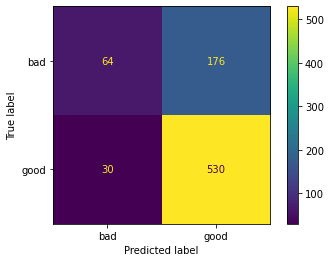

              precision    recall  f1-score   support

         bad       0.68      0.27      0.38       240
        good       0.75      0.95      0.84       560

    accuracy                           0.74       800
   macro avg       0.72      0.61      0.61       800
weighted avg       0.73      0.74      0.70       800


Métricas de avaliação de teste:
[[ 13  47]
 [ 12 128]]


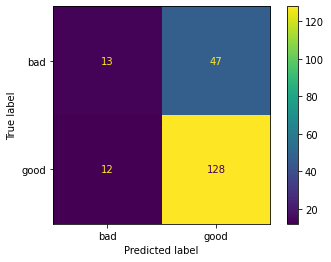

              precision    recall  f1-score   support

         bad       0.52      0.22      0.31        60
        good       0.73      0.91      0.81       140

    accuracy                           0.70       200
   macro avg       0.63      0.57      0.56       200
weighted avg       0.67      0.70      0.66       200



In [49]:
# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = grid_dt_random.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = grid_dt_random.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

In [50]:
grid_dt_random.best_estimator_

Pipeline(steps=[('dt',
                 DecisionTreeClassifier(min_impurity_decrease=0.003953840892873467,
                                        random_state=42))])

In [51]:
grid_dt_random.best_params_

{'dt__criterion': 'gini',
 'dt__min_impurity_decrease': 0.003953840892873467,
 'dt__splitter': 'best'}

# Extra: Bayes Search

A última metodologia que veremos é a __busca Bayesiana__ (ou __otimização Bayesiana__). 

<img src="https://miro.medium.com/max/1400/1*Xfnh-biDrMCECEO37qecKQ.png" width=500>

A ideia desse método é que ele usa inicialmente uma amostra das possíveis seleções de hiperparâmetros. Com essa amostra, ele aprende um pouco sobre como pode ser o nosso erro (ou a nossa acurácia) em função dos hiperparâmetros.

Ele então usa esse aprendizado para tirar uma nova amostra, mas agora de forma mais direcionada para onde pode estar a melhor seleção. Ele segue assim, até "convergir" (até chegar numa resposta final).

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/0/02/GpParBayesAnimationSmall.gif", widht=200>
</div>

Infelizmente, o `scikit-learn` não trás nenhuma implementação para essa metodologia. Então dá para usar uma outra biblioteca chamada `scikit-optimize`.

# Exercício

In [79]:
# Carregar o dataset

df = pd.read_csv('../datasets/titanic.csv')

In [80]:
# Definir quem são feature e quem é target

X = df[['pclass', 'age', 'sex']]
y = df['survived']

In [81]:
X.isna().sum()

pclass    0
age       0
sex       0
dtype: int64

In [82]:
X['sexo'] = pd.get_dummies(X['sex'])['female']

In [83]:
X = X.drop(columns='sex')

In [84]:
X['age'] = pd.to_numeric(X['age'], errors='coerce')

In [85]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  1309 non-null   int64  
 1   age     1046 non-null   float64
 2   sexo    1309 non-null   uint8  
dtypes: float64(1), int64(1), uint8(1)
memory usage: 21.9 KB


In [86]:
X.isna().sum()

pclass      0
age       263
sexo        0
dtype: int64

In [87]:
# preencher dados faltantes
X['age'] = X['age'].fillna(X['age'].median())

In [90]:
# Separa em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [92]:
# modelo

model_sem_otimiz = DecisionTreeClassifier()

In [93]:
model_sem_otimiz.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
predict()

In [ ]:
classification_report()

In [ ]:
model_grid = 

In [ ]:
model_random = 

In [ ]:
house_prices.csv